## Model evaluation :
is a critical step in assessing the performance and reliability of a classifier model. It involves measuring how well the model performs on unseen data and understanding its strengths and weaknesses.

In [1]:
# Import the required libarary
# from tensorflow.keras.models import load_model
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model


In [2]:
# Get the current directory
current_dir = os.getcwd()

# Get the parent directory (one level up)
current_dir = os.path.dirname(current_dir)

# Get the parent directory (one level up)
parent_dir = os.path.dirname(current_dir)

# Print the parent directory
print("Parent Directory:", parent_dir)

Parent Directory: E:\upgrade_capston_project-main


In [3]:
# Load the saved model
models = load_model(parent_dir+"/models/mobilenet_model.keras")

In [4]:
#Load the test data
test_dataset = tf.data.Dataset.load(parent_dir+'/datasets/processed_dataset/mobilenetV2_test_datasets.tfrecord')

## Model Accuracy and Loss

In [5]:
loss , accuracy = models.evaluate(test_dataset)

7/7 ━━━━━━━━━━━━━━━━━━━━ 43s 760ms/step - accuracy: 0.8511 - loss: 0.2412


In [6]:
print("Accuracy:", accuracy)
print("Loss:", loss)

Accuracy: 0.8705357313156128
Loss: 0.24618960916996002


In [7]:
class_name = ['defective','good']

In [8]:
# Predict the image labels from test data

[1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0]
[1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0]


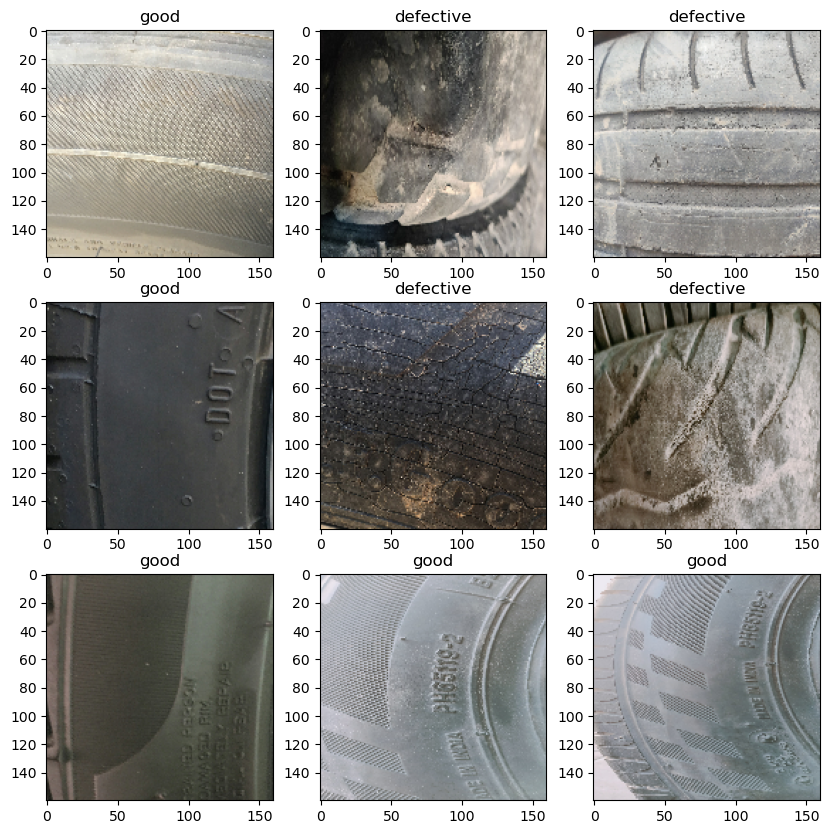

In [9]:
image_batch,label_batch = test_dataset.as_numpy_iterator().next()
predictions = models.predict_on_batch(image_batch).flatten()

predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions<0.5,0,1)

print(predictions.numpy())
print(label_batch)

plt.figure(figsize=(10,10))

for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].astype('uint8'))
        plt.title(class_name[predictions[i]])
        



## Interpretation and Improvement: 
87 % is good accuracy to consider this model. we will try few more models and come to the conclusion of selection of
this one.

## Business Impact :

Manufacturing facilities face significant challenges in detecting faulty tires during production. Defective tires can lead to safety hazards, product recalls, and financial losses. FaultFindy addresses this issue by leveraging historical data and sensor inputs to predict faulty tires before they leave the production line.

Identifying the Good and Defective tyres are very important aspect of currrent era as these days teh vehicles are increased 
and most of the people are used it for transport , so in term of safty of human being its good to identity the issues on time and get rid 
from any bad incidents.

Good tires are critical for safe and efficient operation of vehicles. Here are some key reasons why having good tires is important:

Safety: Tires are the only contact point between the vehicle and the road surface. Good tires provide optimal traction, which is essential for maintaining control of the vehicle, especially during braking, accelerating, and cornering. Tires with sufficient tread depth and proper inflation help prevent skidding, hydroplaning, and loss of control, reducing the risk of accidents.

Handling and Stability: Quality tires contribute to better handling and stability of the vehicle. They provide responsive steering and improved cornering performance, allowing drivers to maneuver safely and confidently, especially in challenging road conditions such as wet or slippery surfaces.

Braking Distance: Tires play a crucial role in braking performance. Good tires with adequate tread depth and optimal grip reduce the braking distance, enabling the vehicle to stop more quickly and effectively in emergency situations, thereby enhancing overall safety on the road.

Fuel Efficiency: Properly maintained tires can improve fuel efficiency. Low rolling resistance tires reduce the energy required to propel the vehicle forward, resulting in lower fuel consumption and reduced carbon emissions. By ensuring tires are properly inflated and aligned, drivers can maximize fuel efficiency and save money on fuel costs.

Comfort and Ride Quality: Quality tires contribute to a smoother and more comfortable ride. They help dampen road vibrations and reduce noise, providing a quieter and more pleasant driving experience for occupants. Additionally, tires with good shock absorption properties enhance ride quality by minimizing bumps and jolts on uneven road surfaces.

Longevity and Durability: Investing in high-quality tires can result in longer tread life and extended tire longevity. Quality tires are designed to withstand wear and tear, punctures, and road hazards, resulting in fewer tire replacements and maintenance costs over time.

All-Weather Performance: Good tires are designed to perform well in various weather conditions, including dry, wet, and snowy conditions. All-season or winter tires with specialized tread patterns and rubber compounds provide enhanced traction and grip, ensuring safe driving regardless of weather conditions.

Vehicle Performance and Handling: Tires influence the overall performance and dynamics of the vehicle. They affect acceleration, braking, cornering, and stability, contributing to the overall driving experience. Choosing tires that match the vehicle's specifications and intended use (e.g., passenger car, SUV, truck, performance vehicle) ensures optimal performance and handling characteristics.

